In [63]:
import pandas as pd
df=pd.read_excel('/content/Predict_Employee_Turnover.xlsx')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.92,0.62,4,266,2,0,0,hr,low,0
1,0.16,0.98,5,284,5,0,0,IT,medium,0
2,0.10,0.85,6,260,4,0,0,sales,low,1
3,0.37,0.54,2,131,3,1,0,hr,medium,1
4,0.90,0.77,3,156,3,0,0,sales,medium,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14949 entries, 0 to 14948
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14949 non-null  float64
 1   last_evaluation        14949 non-null  float64
 2   number_project         14949 non-null  int64  
 3   average_montly_hours   14949 non-null  int64  
 4   time_spend_company     14949 non-null  int64  
 5   Work_accident          14949 non-null  int64  
 6   promotion_last_5years  14949 non-null  int64  
 7   sales                  14949 non-null  object 
 8   salary                 14949 non-null  object 
 9   left                   14949 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [65]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
sales                    0
salary                   0
left                     0
dtype: int64

In [66]:
df[df['left']==1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
2,0.10,0.85,6,260,4,0,0,sales,low,1
3,0.37,0.54,2,131,3,1,0,hr,medium,1
5,0.09,0.94,6,283,5,0,0,IT,low,1
7,0.10,0.95,6,244,5,0,0,IT,medium,1
8,0.46,0.49,2,148,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14926,0.44,0.56,2,133,3,0,0,technical,medium,1
14929,0.37,0.54,2,152,3,0,0,marketing,medium,1
14931,0.38,0.88,3,154,4,0,0,technical,medium,1
14944,0.11,0.92,6,305,4,0,0,technical,low,1


In [67]:
left=len(df[df['left']==1])
left

3555

In [68]:
stay=len(df[df['left']==0])
stay

11394

([<matplotlib.patches.Wedge at 0x7f4bb6435518>,
 [Text(0.8070305820039247, 0.7474634704856196, 'Left'),
  Text(-0.8070305120213404, -0.7474635460452725, 'Stay')],
 [Text(0.440198499274868, 0.4077073475376107, '23.78%'),
  Text(-0.4401984611025493, -0.40770738875196677, '76.22%')])

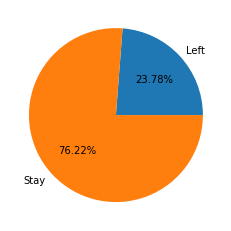

In [69]:
import matplotlib.pyplot as plt
labels=['Left','Stay']
values=[left,stay]
plt.figure(figsize=(4,4))
pie=plt.pie(values,labels=labels,autopct='%4.2f%%')
pie


In [70]:
df=df.rename(columns={'sales':'dept'})
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
0,0.92,0.62,4,266,2,0,0,hr,low,0
1,0.16,0.98,5,284,5,0,0,IT,medium,0
2,0.10,0.85,6,260,4,0,0,sales,low,1
3,0.37,0.54,2,131,3,1,0,hr,medium,1
4,0.90,0.77,3,156,3,0,0,sales,medium,0
...,...,...,...,...,...,...,...,...,...,...
14944,0.11,0.92,6,305,4,0,0,technical,low,1
14945,0.79,0.77,6,233,6,0,0,sales,low,0
14946,0.78,0.87,4,228,5,0,0,support,low,1
14947,0.19,0.63,4,278,6,0,0,technical,low,0


In [71]:
df['dept']

0               hr
1               IT
2            sales
3               hr
4            sales
           ...    
14944    technical
14945        sales
14946      support
14947    technical
14948        sales
Name: dept, Length: 14949, dtype: object

In [72]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
0,0.92,0.62,4,266,2,0,0,hr,low,0
1,0.16,0.98,5,284,5,0,0,IT,medium,0
2,0.10,0.85,6,260,4,0,0,sales,low,1
3,0.37,0.54,2,131,3,1,0,hr,medium,1
4,0.90,0.77,3,156,3,0,0,sales,medium,0


In [73]:
df['salary']=df['salary'].map({'low':1,'medium':2,'high':3})
df['salary']

0        1
1        2
2        1
3        2
4        2
        ..
14944    1
14945    1
14946    1
14947    1
14948    1
Name: salary, Length: 14949, dtype: int64

In [74]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
0,0.92,0.62,4,266,2,0,0,hr,1,0
1,0.16,0.98,5,284,5,0,0,IT,2,0
2,0.10,0.85,6,260,4,0,0,sales,1,1
3,0.37,0.54,2,131,3,1,0,hr,2,1
4,0.90,0.77,3,156,3,0,0,sales,2,0


In [75]:
df.describe(include=['O'])

,dept
count,14949
unique,10
top,sales
freq,4129


In [76]:
df.dept.value_counts()

sales          4129
technical      2712
support        2221
IT             1223
product_mng     897
marketing       856
RandD           785
accounting      763
hr              736
management      627
Name: dept, dtype: int64

In [77]:
df.describe(include=[int])

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
count,14949.000000,14949.000000,14949.000000,14949.000000,14949.000000,14949.000000,14949.000000
mean,3.801793,201.034517,3.497358,0.144224,0.021205,1.594622,0.237809
std,1.231980,49.921103,1.459450,0.351328,0.144073,0.637314,0.425756
min,2.000000,96.000000,2.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,156.000000,3.000000,0.000000,0.000000,1.000000,0.000000
50%,4.000000,200.000000,3.000000,0.000000,0.000000,2.000000,0.000000
75%,5.000000,245.000000,4.000000,0.000000,0.000000,2.000000,0.000000
max,7.000000,310.000000,10.000000,1.000000,1.000000,3.000000,1.000000


In [78]:
df.time_spend_company.value_counts()

3     6425
2     3236
4     2543
5     1467
6      716
10     212
7      188
8      162
Name: time_spend_company, dtype: int64

In [79]:
dept_name=df['dept'].unique().tolist()
dept_name

['hr',
 'IT',
 'sales',
 'accounting',
 'marketing',
 'management',
 'technical',
 'support',
 'RandD',
 'product_mng']

In [80]:
import numpy as np
dept_dic={}
dept_id=np.arange(1,len(dept_name)+1)
#dept_id
for i,dept in enumerate(dept_name):
  dept_dic[dept]=dept_id[i]
dept_dic










{'IT': 2,
 'RandD': 9,
 'accounting': 4,
 'hr': 1,
 'management': 6,
 'marketing': 5,
 'product_mng': 10,
 'sales': 3,
 'support': 8,
 'technical': 7}

In [81]:
df['dept']=df['dept'].map(dept_dic)
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
0,0.92,0.62,4,266,2,0,0,1,1,0
1,0.16,0.98,5,284,5,0,0,2,2,0
2,0.10,0.85,6,260,4,0,0,3,1,1
3,0.37,0.54,2,131,3,1,0,1,2,1
4,0.90,0.77,3,156,3,0,0,3,2,0


In [82]:
corr=df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
satisfaction_level,1.000000,0.105686,-0.142561,-0.019044,-0.101392,0.058539,0.025081,0.010970,0.050105,-0.387689
last_evaluation,0.105686,1.000000,0.349356,0.339575,0.131143,-0.007442,-0.007629,0.019295,-0.012444,0.006110
number_project,-0.142561,0.349356,1.000000,0.416785,0.197185,-0.004894,-0.005717,0.025147,-0.000778,0.022655
average_montly_hours,-0.019044,0.339575,0.416785,1.000000,0.127368,-0.010491,-0.002018,0.001795,-0.001511,0.070292
time_spend_company,-0.101392,0.131143,0.197185,0.127368,1.000000,0.000613,0.067239,-0.016187,0.049051,0.145011
Work_accident,0.058539,-0.007442,-0.004894,-0.010491,0.000613,1.000000,0.038700,0.021438,0.008663,-0.154619
promotion_last_5years,0.025081,-0.007629,-0.005717,-0.002018,0.067239,0.038700,1.000000,-0.015375,0.097270,-0.061495
dept,0.010970,0.019295,0.025147,0.001795,-0.016187,0.021438,-0.015375,1.000000,0.005041,-0.024416
salary,0.050105,-0.012444,-0.000778,-0.001511,0.049051,0.008663,0.097270,0.005041,1.000000,-0.158008
left,-0.387689,0.006110,0.022655,0.070292,0.145011,-0.154619,-0.061495,-0.024416,-0.158008,1.000000


In [83]:
corr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'left'], dtype=object)

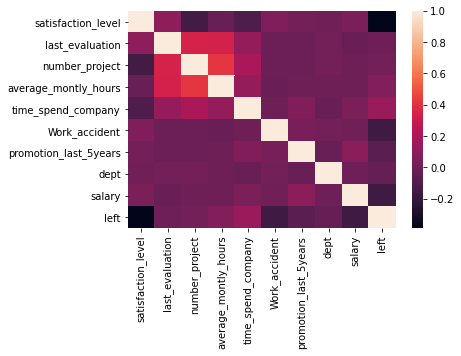

In [84]:
import seaborn as sns
sns.heatmap(corr)

In [85]:
df[['left','satisfaction_level']]

,left,satisfaction_level
0,0,0.92
1,0,0.16
2,1,0.10
3,1,0.37
4,0,0.90
...,...,...
14944,1,0.11
14945,0,0.79
14946,1,0.78
14947,0,0.19


**Analyze by binary relationship**

In [86]:
df[['left','satisfaction_level']].groupby(['left'],as_index=True).mean()


,satisfaction_level
left,
0,0.666740
1,0.440414


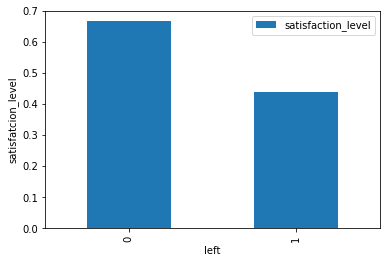

In [87]:
df[['left','satisfaction_level']].groupby(['left'],as_index=True).mean().plot(kind='bar')
plt.xlabel("left")
plt.ylabel("satisfatcion_level")
plt.show()

In [88]:
df[['left','Work_accident']]

,left,Work_accident
0,0,0
1,0,0
2,1,0
3,1,1
4,0,0
...,...,...
14944,1,0
14945,0,0
14946,1,0
14947,0,0


In [89]:
df[['left','Work_accident']].groupby(['left'],as_index=False).mean().sort_values(by='left',ascending=False)

,left,Work_accident
1,1,0.046976
0,0,0.174566


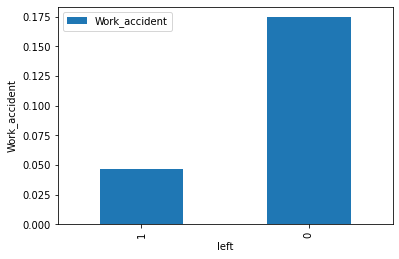

In [90]:
df[['left','Work_accident']].groupby(['left'],as_index=True).mean().sort_values(by='left',ascending=False).plot(kind='bar')
plt.xlabel('left')
plt.ylabel('Work_accident')
plt.show()

In [91]:
df[['left','time_spend_company']]

,left,time_spend_company
0,0,2
1,0,5
2,1,4
3,1,3
4,0,3
...,...,...
14944,1,4
14945,0,6
14946,1,5
14947,0,6


In [92]:
df[['left','time_spend_company']].groupby(['time_spend_company'],as_index=False).mean().sort_values(by='left',ascending=False)

,time_spend_company,left
3,5,0.565781
2,4,0.347228
4,6,0.290503
1,3,0.246226
0,2,0.016069
5,7,0.000000
6,8,0.000000
7,10,0.000000


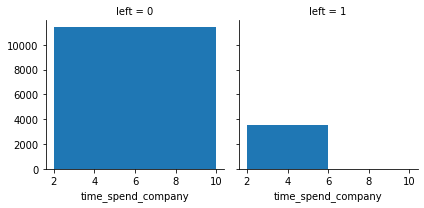

In [93]:
g=sns.FacetGrid(df,col='left')
g.map(plt.hist,'time_spend_company',bins=1)

In [94]:
df[['left','time_spend_company']].groupby(['time_spend_company'],as_index=True).mean()

,left
time_spend_company,
2,0.016069
3,0.246226
4,0.347228
5,0.565781
6,0.290503
7,0.000000
8,0.000000
10,0.000000


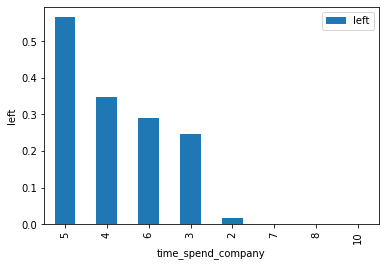

In [95]:
df[['left','time_spend_company']].groupby(['time_spend_company'],as_index=True).mean().sort_values(by='left',ascending=False).plot(kind='bar')
plt.xlabel('time_spend_company')
plt.ylabel('left')
plt.show()

In [96]:
df[['left','salary']]

,left,salary
0,0,1
1,0,2
2,1,1
3,1,2
4,0,2
...,...,...
14944,1,1
14945,0,1
14946,1,1
14947,0,1


In [97]:
df[['left','salary']].groupby('salary',as_index=False).mean().sort_values(by='left',ascending=False)

,salary,left
0,1,0.296682
1,2,0.203862
2,3,0.066451


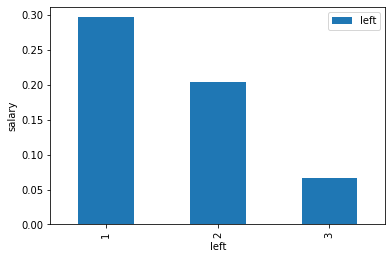

In [98]:
df[['left','salary']].groupby('salary',as_index=True).mean().sort_values(by='left',ascending=False).plot(kind='bar')
plt.xlabel('left')
plt.ylabel('salary')
plt.show()


In [99]:
df[['average_montly_hours','last_evaluation']]

,average_montly_hours,last_evaluation
0,266,0.62
1,284,0.98
2,260,0.85
3,131,0.54
4,156,0.77
...,...,...
14944,305,0.92
14945,233,0.77
14946,228,0.87
14947,278,0.63


In [100]:
df[['average_montly_hours','last_evaluation']].groupby(['average_montly_hours'],as_index=False).mean().sort_values(by='last_evaluation',ascending=False)


,average_montly_hours,last_evaluation
192,288,0.936667
193,289,0.911053
211,307,0.908571
212,308,0.886000
202,298,0.885385
...,...,...
34,130,0.555763
35,131,0.554348
33,129,0.546508
31,127,0.529444


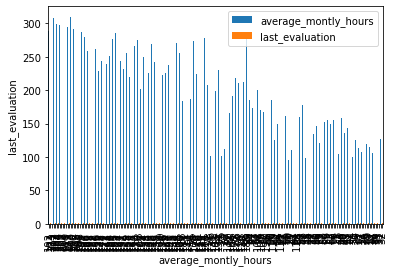

In [101]:
df[['average_montly_hours','last_evaluation']].groupby(['average_montly_hours'],as_index=False).mean().sort_values(by='last_evaluation',ascending=False).plot(kind='bar')
plt.xlabel('average_montly_hours')
plt.ylabel('last_evaluation')
plt.show()

In [102]:
df[['average_montly_hours','number_project']].groupby(['number_project'],as_index=False).mean().sort_values(by='average_montly_hours',ascending=False)

,number_project,average_montly_hours
5,7,276.233202
4,6,238.623077
3,5,212.098289
2,4,205.089405
1,3,197.490981
0,2,160.422092


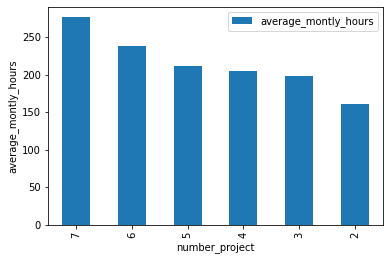

In [103]:
df[['average_montly_hours','number_project']].groupby(['number_project'],as_index=True).mean().sort_values(by='average_montly_hours',ascending=False).plot(kind='bar')
plt.xlabel('number_project')
plt.ylabel('average_montly_hours')
plt.show()

In [104]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
0,0.92,0.62,4,266,2,0,0,1,1,0
1,0.16,0.98,5,284,5,0,0,2,2,0
2,0.10,0.85,6,260,4,0,0,3,1,1
3,0.37,0.54,2,131,3,1,0,1,2,1
4,0.90,0.77,3,156,3,0,0,3,2,0
...,...,...,...,...,...,...,...,...,...,...
14944,0.11,0.92,6,305,4,0,0,7,1,1
14945,0.79,0.77,6,233,6,0,0,3,1,0
14946,0.78,0.87,4,228,5,0,0,8,1,1
14947,0.19,0.63,4,278,6,0,0,7,1,0


In [0]:
df.drop(['number_project'],axis=1,inplace=True)

In [106]:
df

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
0,0.92,0.62,266,2,0,0,1,1,0
1,0.16,0.98,284,5,0,0,2,2,0
2,0.10,0.85,260,4,0,0,3,1,1
3,0.37,0.54,131,3,1,0,1,2,1
4,0.90,0.77,156,3,0,0,3,2,0
...,...,...,...,...,...,...,...,...,...
14944,0.11,0.92,305,4,0,0,7,1,1
14945,0.79,0.77,233,6,0,0,3,1,0
14946,0.78,0.87,228,5,0,0,8,1,1
14947,0.19,0.63,278,6,0,0,7,1,0


In [107]:
X=df.iloc[:,:-1]
X


,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,0.92,0.62,266,2,0,0,1,1
1,0.16,0.98,284,5,0,0,2,2
2,0.10,0.85,260,4,0,0,3,1
3,0.37,0.54,131,3,1,0,1,2
4,0.90,0.77,156,3,0,0,3,2
...,...,...,...,...,...,...,...,...
14944,0.11,0.92,305,4,0,0,7,1
14945,0.79,0.77,233,6,0,0,3,1
14946,0.78,0.87,228,5,0,0,8,1
14947,0.19,0.63,278,6,0,0,7,1


In [108]:
Y=df.iloc[:,-1]
Y

0        0
1        0
2        1
3        1
4        0
        ..
14944    1
14945    0
14946    1
14947    0
14948    0
Name: left, Length: 14949, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1234,stratify=Y)

In [110]:
X_train

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
13673,0.43,0.66,135,2,0,0,2,3
9611,0.37,0.51,154,3,1,0,3,1
6939,0.63,0.47,180,3,1,0,8,3
8120,0.09,0.86,279,4,0,0,3,1
665,0.73,0.73,194,2,0,0,3,1
...,...,...,...,...,...,...,...,...
5038,0.56,0.97,270,3,1,0,7,2
10121,0.96,0.80,145,2,0,0,1,2
11865,0.96,0.75,176,4,0,0,3,1
6681,0.73,0.67,153,3,0,0,2,3


In [111]:
Y_test

14917    0
4819     0
10821    1
9680     0
3287     0
        ..
7851     0
8346     0
10930    0
318      1
7990     1
Name: left, Length: 4485, dtype: int64

In [112]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
Y_predict=lr.predict(X_test)
Y_predict

array([0, 0, 0, ..., 1, 0, 0])

In [114]:
lr.score(X_test,Y_test)

0.7714604236343366

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
knn.predict(X_test)
round(knn.score(X_test,Y_test)*100,2)

89.94